# Vis of DeepGaze resutls

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
IG = pd.read_csv('IG'+'_mean_noface.csv', index_col=[0])
SIM = pd.read_csv('SIM'+'_mean_noface.csv', index_col=[0])
NSS = pd.read_csv('NSS'+'_mean_noface.csv', index_col=[0])
AUC = pd.read_csv('AUC'+'_mean_noface.csv', index_col=[0])


In [4]:
SIM

,all,person,no person,animal,sports,electronic
aim,0.394616,0.364064,0.451696,0.335876,0.323169,0.396621
cas,0.495140,0.472677,0.537109,0.430710,0.476040,0.478320
covsal,0.502877,0.487883,0.530890,0.486593,0.474478,0.483885
gbvs,0.542515,0.512920,0.597809,0.487240,0.499293,0.534094
icf,0.519075,0.498890,0.556787,0.457074,0.483482,0.505949
ik,0.445675,0.426353,0.481492,0.396768,0.413913,0.446081
sun,0.419288,0.387883,0.477965,0.346989,0.346531,0.419481
dg,0.650369,0.639309,0.671034,0.631222,0.641099,0.633137


In [5]:
sim = SIM.loc[['dg']]
auc = AUC.loc[['dg']]
nss = NSS.loc[['dg']]
ig = IG.loc[['dg']]

In [6]:
ig

,all,person,no person,animal,sports,electronic
dg,3.623762,3.402096,4.037908,3.471155,2.74859,3.844617


In [7]:
sim.values[0]

array([0.65036937, 0.639309  , 0.67103379, 0.6312223 , 0.64109887,
       0.63313749])

In [8]:
DG = pd.DataFrame([sim.values[0], auc.values[0], nss.values[0], ig.values[0]],
                  index=['sim', 'auc', 'nss', 'ig'], 
                  columns=['all', 'person', 'no person', 'animal', 'sports', 'electronic'])
DG

,all,person,no person,animal,sports,electronic
sim,0.650369,0.639309,0.671034,0.631222,0.641099,0.633137
auc,0.774691,0.785386,0.754710,0.782197,0.802257,0.770191
nss,1.149773,1.228926,1.001891,1.282687,1.357659,1.140596
ig,3.623762,3.402096,4.037908,3.471155,2.748590,3.844617


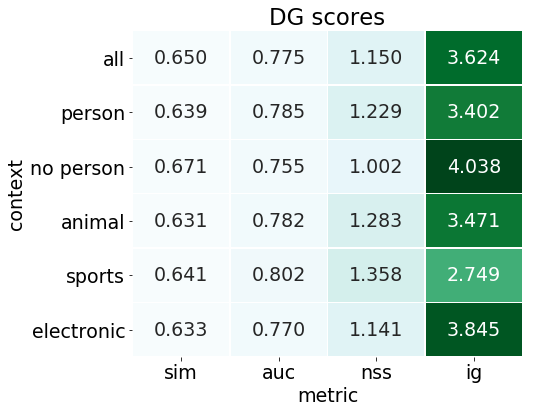

In [11]:
matplotlib.rcParams.update({'font.size': 19})

f, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(DG.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f', cmap='BuGn', cbar=False);
plt.xlabel('metric')
plt.ylabel('context')
plt.title('{} scores'.format('DG'));

plt.savefig('../plots/DG_scores.png', bbox_inches='tight', pad_inches=0)